# SciPy Integrate Module

The `scipy.integrate` module provides functions for numerical integration and solving ordinary differential equations (ODEs). Here are some key functions available in this module:

## Numerical Integration Functions

### 1. `quad()`

**Description**: Integrate a function of one variable.

**Parameters**:
- `func`: The function to integrate.
- `a`, `b`: Limits of integration.
- `args`: Extra arguments to pass to `func`.
- `**options`: Integration options (e.g., `epsabs`, `epsrel`).

**Returns**: A tuple containing the integral and an estimate of the absolute error.

In [1]:
from scipy.integrate import quad

result, error = quad(lambda x: x**2, 0, 1)
print("Integral:", result)  # Output: Integral: 0.33333333333333337

Integral: 0.33333333333333337


### 2. `dblquad()`
Description: Integrate a function of two variables (double integral).

Parameters:

- func: The function to integrate.
- a, b: Limits for the first variable.
- gfun, hfun: Functions that define the limits for the second variable.
- args: Extra arguments to pass to func.
- **options: Integration options.
- Returns: A tuple containing the integral and an estimate of the absolute error.

In [2]:
from scipy.integrate import dblquad

result, error = dblquad(lambda x, y: x * y, 0, 1, lambda x: 0, lambda x: 1)
print("Double Integral:", result)  # Output: Double Integral: 0.16666666666666666

Double Integral: 0.24999999999999997


### 3. `tplquad()`
Description: Integrate a function of three variables (triple integral).

Parameters: Similar to dblquad but adds two more limit functions for the third variable.

Returns: A tuple containing the integral and an estimate of the absolute error.

In [3]:
from scipy.integrate import tplquad

result, error = tplquad(lambda x, y, z: x * y * z, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)
print("Triple Integral:", result)  # Output: Triple Integral: 0.041666666666666664

Triple Integral: 0.12499999999999999


### 4. `nquad()`
Description: Integrate a function of multiple variables using adaptive quadrature.

Parameters: Function to integrate, limits of integration for each variable.

Returns: A tuple containing the integral and an estimate of the absolute error.

In [4]:
from scipy.integrate import nquad

result, error = nquad(lambda x, y: x**2 + y**2, [[0, 1], [0, 1]])
print("Multiple Integral:", result)  # Output: Multiple Integral: 0.33333333333333337

Multiple Integral: 0.6666666666666669


### 5. `simpson()`
Description: Integrate using Simpson's rule.

Parameters:

- y: Array of function values.
- x: Array of x-coordinates (optional).
- Returns: The estimated integral.

In [9]:
import numpy as np
from scipy.integrate import simpson

x = np.array([0, 1, 2, 3])
y = x**2 + np.sin(x)
result = simpson(y, x=x)
print("Simpson's Rule Integral:", result)

Simpson's Rule Integral: 11.01993616119383


In [10]:
import sympy as smp

x = smp.Symbol('x')
y = x**2 + smp.sin(x)
y

x**2 + sin(x)

In [18]:
inte = smp.integrate(y, (x, 0, 3))
inte.evalf()

10.9899924966004

In [19]:
quad(lambda x : x**2 + np.sin(x), 0, 3)

(10.989992496600443, 1.220134271018352e-13)

In [24]:
y_inte = smp.integrate(y, x)
y_vals = smp.lambdify(x, y_inte, 'numpy')
y_vals(3) - y_vals(0)

np.float64(10.989992496600445)

### 6. `trapezoid()`
Description: Integrate using the trapezoidal rule.

Parameters:

- y: Array of function values.
- x: Array of x-coordinates (optional).
- Returns: The estimated integral.

In [30]:
from scipy.integrate import trapezoid

x = np.linspace(0, 3, 100)
y = x**2
result = trapezoid(y, x)
print("Trapezoidal Rule Integral:", result)  # Output: Trapezoidal Rule Integral:  9.000459136822775

Trapezoidal Rule Integral: 9.000459136822775


## ODE Solvers
### 7. `odeint()`
Description: Integrate a system of ordinary differential equations using the LSODA method.

Parameters:

- func: The function defining the system of ODEs.
- y0: Initial conditions.
- t: Array of time points at which to store the solution.
- args: Additional arguments to pass to func.
- Returns: The values of 𝑦 at the specified time points.

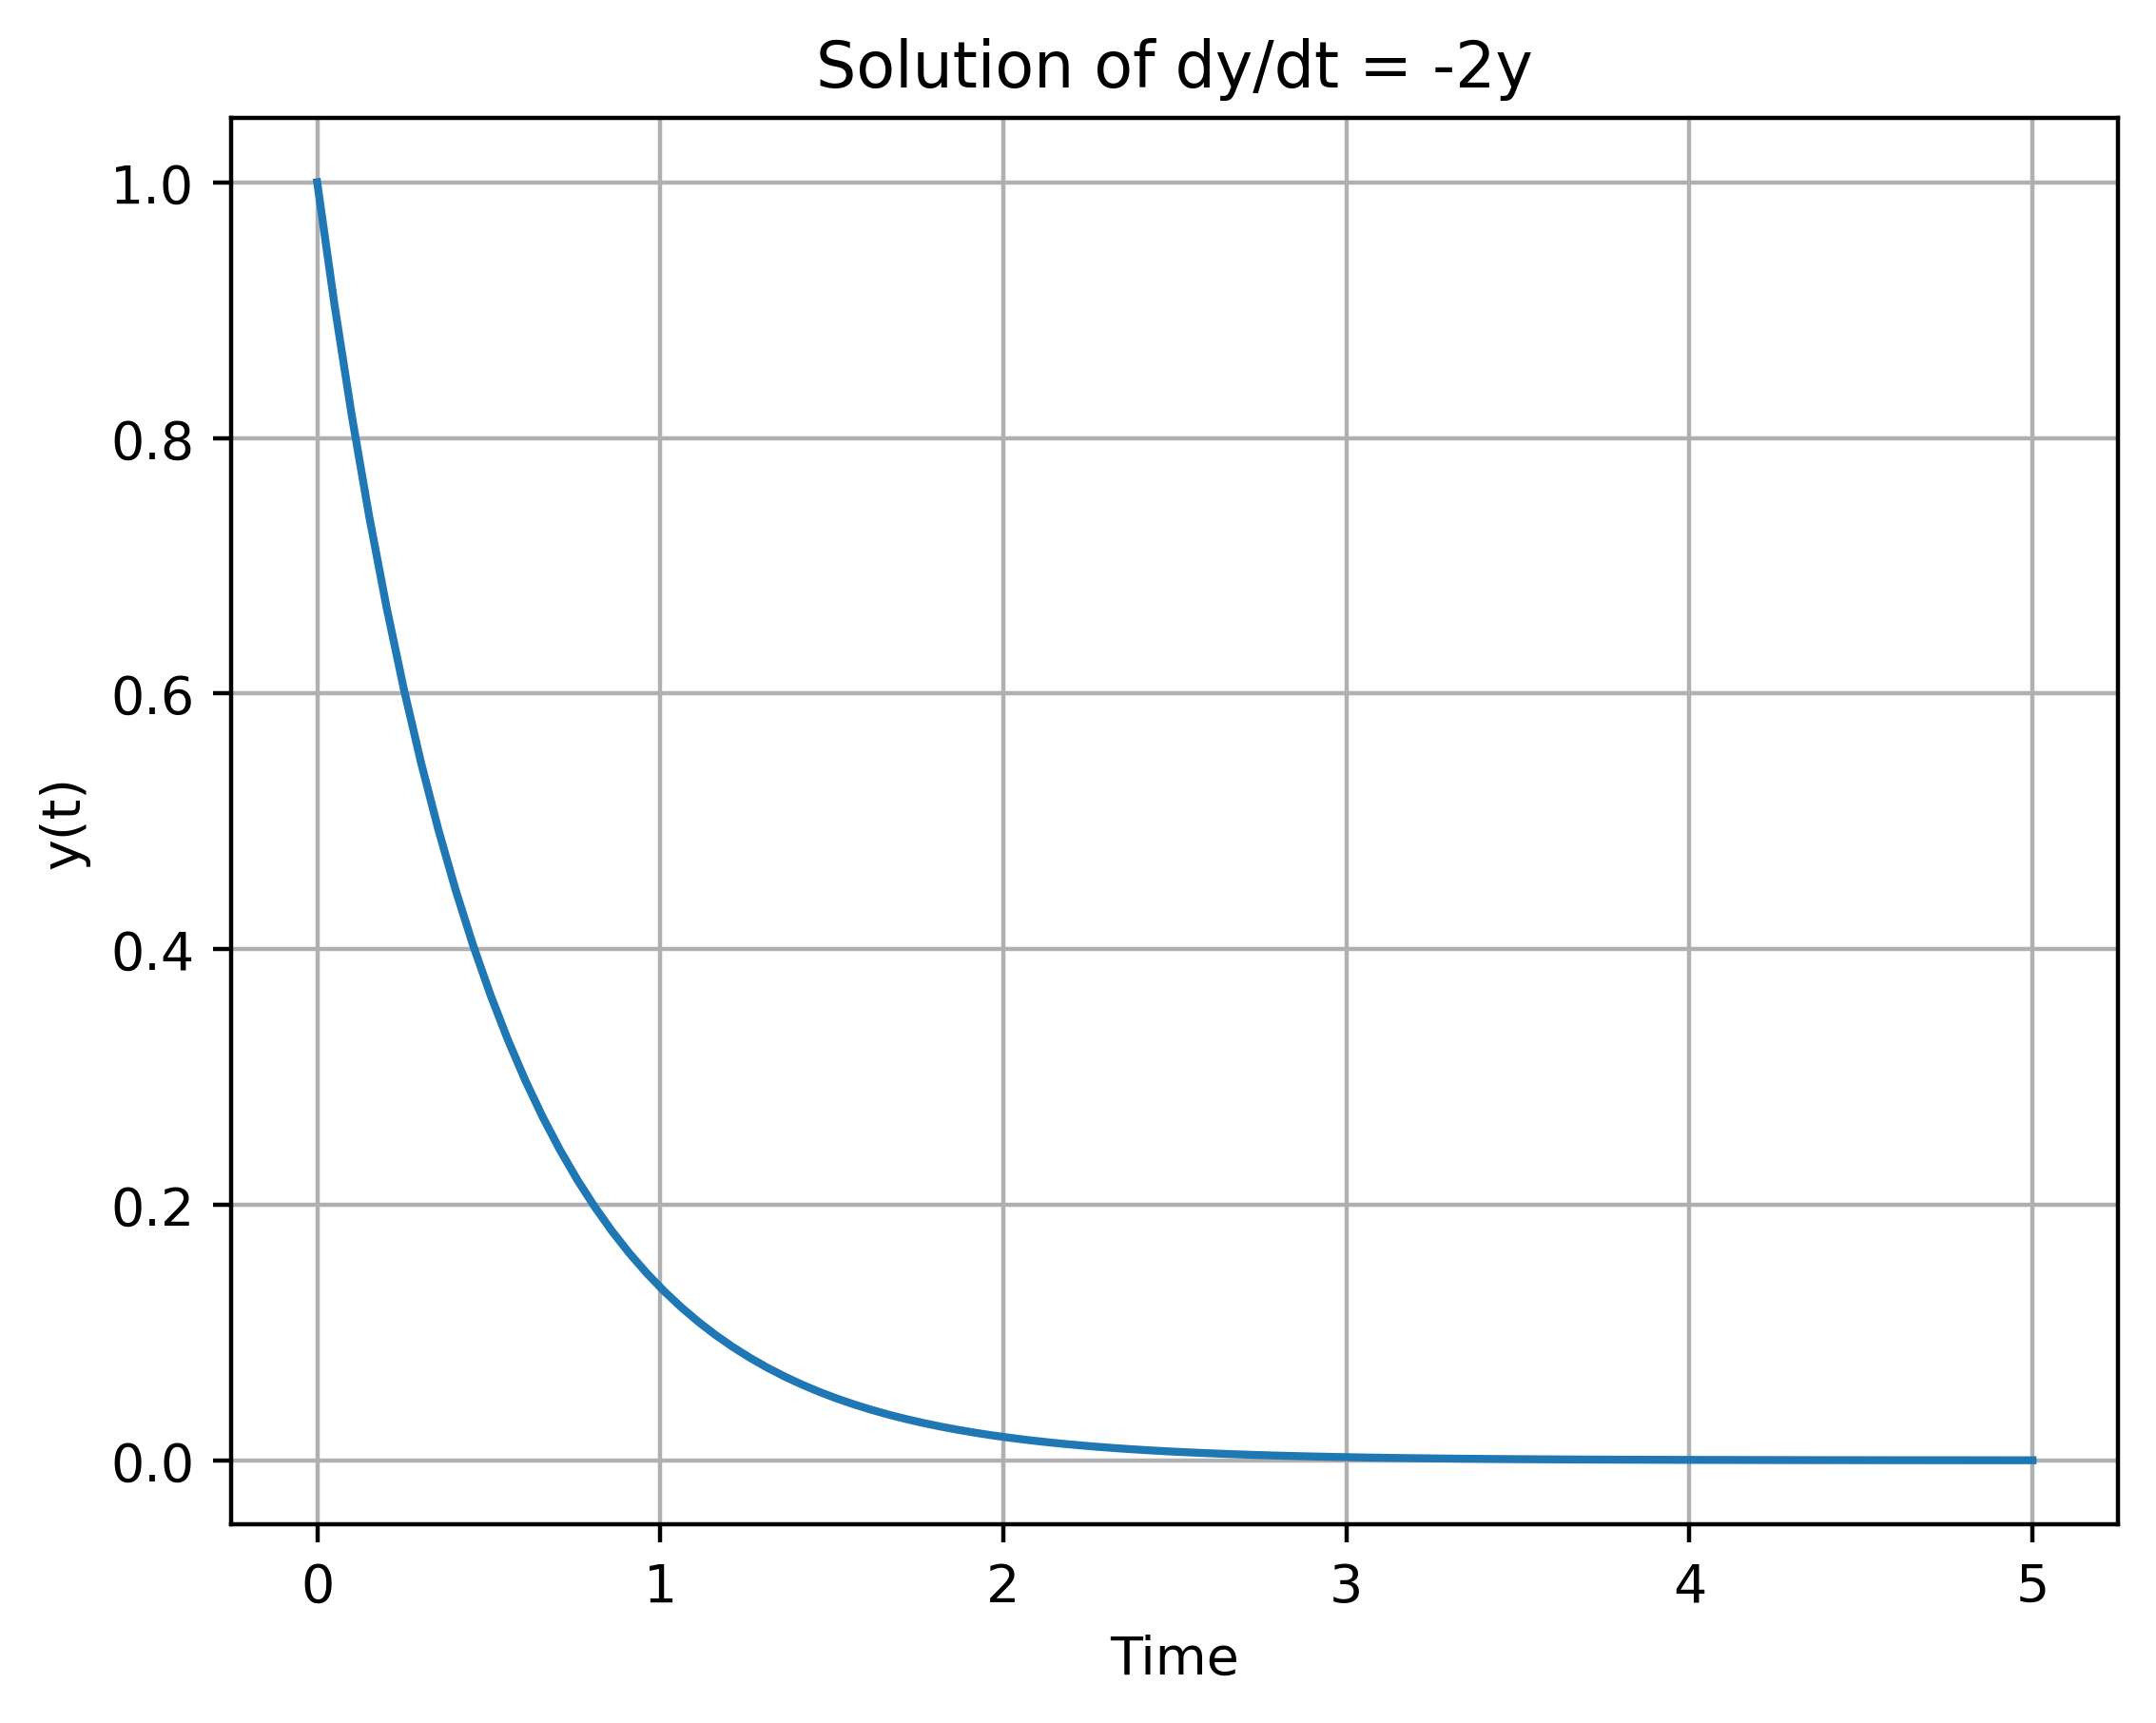

In [39]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the model (dy/dt = -2 * y)
def model(y, t):
    return -2 * y

# Initial condition
y0 = [1]

# Time points where solution is computed
t = np.linspace(0, 5, 100)

# Solve the ODE
sol = odeint(model, y0, t)

# Plot the solution
plt.figure(dpi=400)
plt.plot(t, sol)
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y')
plt.grid(True)
plt.show()

# Display the solution array
#print(sol)


### 8. `solve_ivp()`
Description: Integrate a system of ODEs with more options and support for events.

Parameters:

- fun: The function defining the ODE system.
- t_span: The interval of integration as $[t_0, t_f]$.
- y0: Initial conditions.
- method: Integration method (e.g., 'RK45', 'RK23', 'DOP853').
- t_eval: Specific time points to evaluate the solution.
- Returns: An object containing the time points, solution array, and other information about the integration process.

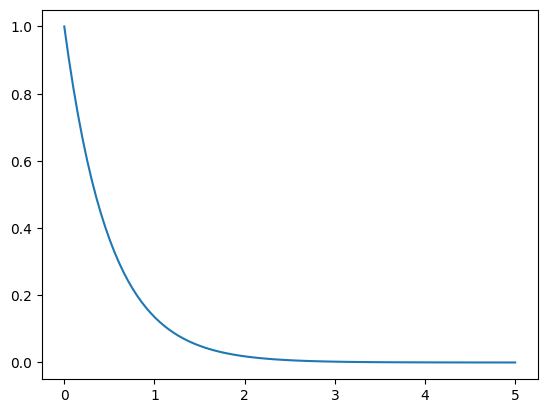

In [58]:
from scipy.integrate import solve_ivp

def model(t, y):
    return -2 * y

sol = solve_ivp(model, [0, 5], [1], t_eval=np.linspace(0, 5, 100))
plt.plot(sol['t'], sol['y'].T)

### 9. `fixed_quad()`
Description: Compute the integral of a function using fixed-order Gaussian quadrature.

Parameters:

- func: The function to integrate.
- a, b: Limits of integration.
- n: Number of points for the quadrature.
- Returns: A tuple of the integral and the error estimate.

In [59]:
from scipy.integrate import fixed_quad

result, error = fixed_quad(lambda x: x**2, 0, 1, n=5)
print("Fixed Quadrature Integral:", result)  # Output: Fixed Quadrature Integral: 0.33333333333333337

Fixed Quadrature Integral: 0.33333333333333326


### 10. ode class
Description: A class to define and solve ODEs with methods like set_integrator, set_initial_value, and integrate.

In [61]:
from scipy.integrate import ode

def model(t, y):
    return -2 * y

# Create an ODE solver object with the given model and integrator
ode_solver = ode(model).set_integrator('dopri5')

# Set initial conditions (t=0, y=1)
ode_solver.set_initial_value(1, 0)

t_values = []
y_values = []

# Integrate until t reaches 5
while ode_solver.successful() and ode_solver.t < 5:
    t_values.append(ode_solver.t)
    y_values.append(ode_solver.y[0])  # ode_solver.y is a list of values
    
    # Integrate over the next step (you can adjust step size)
    ode_solver.integrate(ode_solver.t + 0.1)

# Print results
print("Time values:", t_values)
print("Solution values:", y_values)


Time values: [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998]
Solution values: [np.float64(1.0), np.float64(0.8187307539938474), np.float64(0.6703200498168248), np.float64(0.5488116430390184), np.float64(0.4493289724977713), n

In [17]:
import sympy as smp

x = smp.symbols('x')
y = x**3 + 2*x**2 + x + 1
y

x**3 + 2*x**2 + x + 1

In [22]:
from sympy import evaluate


dydx = smp.diff(y, x)
dydx_1 = dydx.subs(x, 1)
dydx_1


8

In [63]:
import scipy.integrate 
dir(scipy.integrate)

['AccuracyWarning',
 'BDF',
 'DOP853',
 'DenseOutput',
 'IntegrationWarning',
 'LSODA',
 'ODEintWarning',
 'OdeSolution',
 'OdeSolver',
 'RK23',
 'RK45',
 'Radau',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bvp',
 '_dop',
 '_ivp',
 '_lsoda',
 '_ode',
 '_odepack',
 '_odepack_py',
 '_quad_vec',
 '_quadpack',
 '_quadpack_py',
 '_quadrature',
 '_vode',
 'complex_ode',
 'cumulative_simpson',
 'cumulative_trapezoid',
 'dblquad',
 'dop',
 'fixed_quad',
 'lsoda',
 'newton_cotes',
 'nquad',
 'ode',
 'odeint',
 'odepack',
 'qmc_quad',
 'quad',
 'quad_vec',
 'quadpack',
 'quadrature',
 'romb',
 'romberg',
 'simpson',
 'solve_bvp',
 'solve_ivp',
 'test',
 'tplquad',
 'trapezoid',
 'vode']